# ЛАБОРАТОРНАЯ РАБОТА 6.
## ПРИБЛИЖЕНИЕ ФУНКЦИЙ
Выполнил Бобровских Глеб, БПМ151.
Задания 6.1 - 6.3

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Задача 1.**

Функция $y=f(x)$ задана таблицей значений $y_0, y_1 , \dots y_n$ в точках $x_0, x_1 ,\dots x_n$. Используя *метод
наименьших квадратов (МНК)*, найти многочлен $P_m(x) = a_0 + a_1x + \dots + a_m x_m$
наилучшего среднеквадратичного приближения оптимальной степени $m=m^*$. За оптимальное значение $m^*$ принять ту
степень многочлена, начиная с которой величина $\sigma_m = \sqrt{\frac{1}{n - m}\sum \limits_{k=0}^n (P_m(x_k) - y_k)^2}$ стабилизируется или начинает возрастать.


1)  Задать векторы $x$ и $y$ исходных данных.

In [2]:
x = np.asarray([-0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3])
y = np.asarray([0.72, 1.271, 1.2, 0.7363, 0.24, -0.175, -0.36, -0.328, 0.0, 0.3538, 0.72, 0.6969, 0.0, -1.792, -5.16])

2) Используя функцию [numpy.polyfit](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html), найти многочлены $P_m, m=0,1,2, \dots$, по методу наименьших квадратов. Вычислить соответствующие им значения $\sigma_m$.

In [81]:
m_range = len(x) - 1
sigma = np.zeros(m_range)
for m in range(m_range):
    f = np.poly1d(np.polyfit(x, y, m))
    sigma[m] = np.sqrt(1/(len(x) - m)*np.sum([(f(x[i]) - y[i])**2 for i in range(len(x))]))


3)  Построить гистограмму зависимости $\sigma_m$ от $m$, на основании которой выбрать оптимальную степень $m^*$
многочлена наилучшего среднеквадратичного приближения.

<Container object of 14 artists>

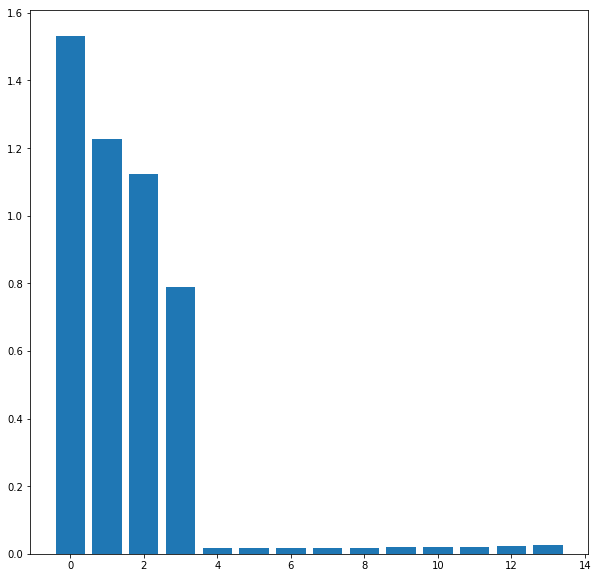

In [86]:
plt.figure(figsize=(10, 10))
plt.bar(np.arange(m_range), sigma)

$m = 4$ - удовлетворяет условию с $\sigma_m$.

4)  На одном чертеже построить графики многочленов $P_m, m=0,1,2, \dots, m^*$, и точечный график исходной
функции.

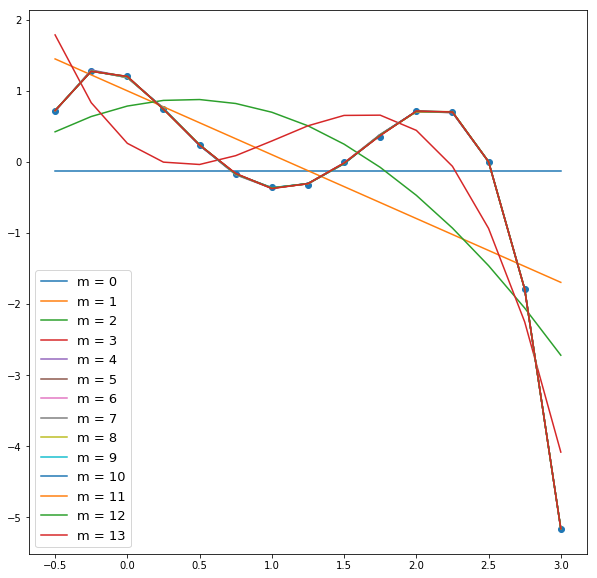

In [85]:
plt.figure(figsize=(10, 10))
plt.scatter(x, y)
for m in range(m_range):
    f = np.poly1d(np.polyfit(x, y, m))
    plt.plot(x, f(x), label=('m = '+str(m)))
    plt.legend(fontsize=13)

**Задача 2.**

В таблице приведены результаты наблюдений за перемещением $x$ материальной точки по оси $Ох$
в моменты времени $t \in [t_0, T]$. Известно, что движение является равномерным и описывается линейной
зависимостью $x(t)=vt+b$. Используя метод наименьших квадратов, определить скорость $v$ и спрогнозировать
положение точки в момент времени $t=2T$. На одном чертеже построить график движения точки и точечный
график исходных наблюдений.


In [117]:
t = np.array([0.0, 0.6, 1.2, 1.8, 2.4, 3.0, 4.2, 4.8, 5.4, 6.0])
x = np.array([6.449, 19.97, 33.91, 48.2, 64.15, 76.9, 106.2, 122.2, 135.6, 149])

In [118]:
a = np.polyfit(t, x, 1)
print('v =', a[1])

v = 5.69371992654


In [119]:
f = np.poly1d(a)
print(f)
print('\nx(2T) =', f(2*t[-1]))

 
24 x + 5.694

x(2T) = 293.710781451


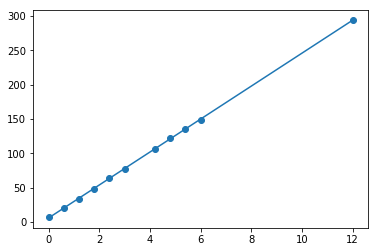

In [120]:
t = np.append(t, 2*t[-1])
x = np.append(x, f(t[-1]))
plt.scatter(t, x)
plt.plot(t, f(t))

**Задача 3.**

Зависимость между величинами $x$ и $y$ описывается функцией $y=f(x, a, b)$, где $a$ и $b$ – неизвестные
параметры. Найти эти параметры, сведя исходную задачу к линейной задаче метода наименьших квадратов.

*УКАЗАНИЕ.*

Свести исходную задачу к линейной задаче МНК можно, сделав подходящую замену переменных. Например, если исходная зависимость имеет вид $y = e^{a + bx^2}$, то прологарифмировав исходное равенство и введя новые переменные $y = \ln{y}$ и $t = x^{2}$, получаем задачу об определении коэффициентов линейной зависимости $s = a + bt$.

Вариант 4: $y = \sqrt{a + bx^{2}}$

Сведение к МНК:
*замена $z = y^{2}$, $t = x^{2}$ *

In [121]:
x = np.array([-2.0, -1.6, -1.2, -0.8, -0.4, 0.0])
y = np.array([1.649, 1.942, 2.142, 2.274, 2.35, 2.375])

In [122]:
a = np.polyfit(y**2, x**2, 1)
f = np.poly1d(a)
print(a)
print(f)

[-1.36979984  7.72503784]
 
-1.37 x + 7.725


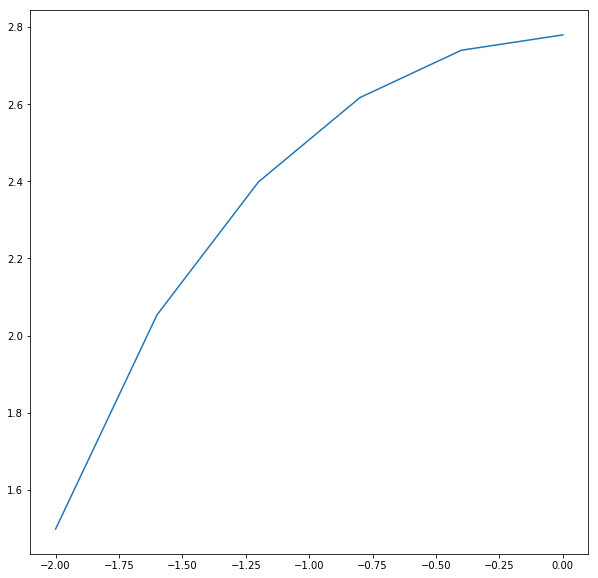

In [123]:
plt.figure(figsize=(10, 10))
plt.plot(x, np.sqrt(f(x**2)))